In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
print(np.shape(x_train))
print(np.shape(x_train.flatten()), np.shape(y_train))

(100, 1)
(100,) (100,)


we converted x to has the same shape as y.

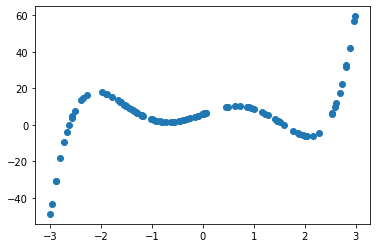

In [3]:
plt.scatter(x_train, y_train)
plt.show()

the plot shows us that it does not follow a linear function.
First of all we need to define what our hypothesis function looks like because we will be using this hypothesis for calculating the cost later on. We know for linear regression our hypothesis is: hθ(x) = θ0 + θ1x1, because we have one feature.

What about the cost function? The equation for the cost function is: 

In [4]:
def loss_function(x_train, y_train, curr_theta):
	'''
	x_train: [2xnum_data]
	y_train: [1xnum_data]
	'''
	num_data = np.shape(y_train)[1]
	assert np.shape(x_train)[1] == np.shape(y_train)[1]

	error = y_train - np.matmul(curr_theta, x_train)  # 1 x num_data 
	cost = np.sum(error**2) / (2 * num_data)
	return cost

because we have two theta the x_train will be a matrix of 2xnumber of data. we have a y, so it will be 1xnumber of data.

In [5]:
def plot_data(x, y_gt, y_pred):
  fig = plt.figure()
  ax1 = fig.add_subplot(111)

  ax1.scatter(x.flatten(), y_gt.flatten(), s=10, c='b', marker="s", label='first')
  ax1.scatter(x.flatten(), y_pred.flatten(), s=10, c='r', marker="o", label='second')
  plt.legend(loc='upper left');
  plt.show()

Now that we have the cost we must minimize it. For that we use gradient descent. We multiply the derivative of the cost function with the learning rate(α) and subtract it from the present value of the parameters(θ) to get the new updated parameters(θ).

In [6]:
def gradient_descent(x_train, y_train, curr_theta, learning_rate=0.1, num_steps=1000, thresh: float=1e-5, do_print=True):
	'''
	x_train: [num_features, num_data]
	y_train: [1, num_data]
	curr_theta: [1, num_features]
	'''
	assert np.shape(x_train)[1] == np.shape(y_train)[1]

	num_data = np.shape(y_train)[1]
	loss_per_step = []
	
	for step in range(num_steps):

		curr_predict = np.matmul(curr_theta, x_train)  # 1 x num_data
		error = (y_train - curr_predict).T  # num_data x 1
		assert np.shape(curr_predict) == np.shape(y_train)

		if np.linalg.norm(error) < thresh:
			break

		d_cost_d_theta = (1/num_data) * (np.matmul(x_train, error)).T # 1 x num_features
		new_theta = curr_theta + (learning_rate) * d_cost_d_theta

		new_loss = loss_function(x_train, y_train, new_theta)
		if do_print:
			print(f'step = {step}, curr_theta = {curr_theta}, new_theta={new_theta}, new_loss = {new_loss}')
		loss_per_step.append(new_loss)

		if step >= 2:
			if (np.abs(loss_per_step[-1] - loss_per_step[-2]) < thresh):
				break
	
		# update theta 
		curr_theta = new_theta

	return new_theta, loss_per_step

We use assert to be assure that the shape of x and y is same, otherwise we receive an error.
I set a tresh=.000001, because if the difference is less than this number, there is no need to continue. It is a small value.

(1, 100) (1, 100)
x_train_bias = (2, 100)
step = 0, curr_theta = [[0. 0.]], new_theta=[[0.56057372 0.87002367]], new_loss = 106.89049231669031
step = 1, curr_theta = [[0.56057372 0.87002367]], new_theta=[[1.08054776 1.49213414]], new_loss = 100.96782261601737
step = 2, curr_theta = [[1.08054776 1.49213414]], new_theta=[[1.55957742 1.93909095]], new_loss = 97.04817649222468
step = 3, curr_theta = [[1.55957742 1.93909095]], new_theta=[[1.99864519 2.26208176]], new_loss = 94.30294041030082
step = 4, curr_theta = [[1.99864519 2.26208176]], new_theta=[[2.39954474 2.49713978]], new_loss = 92.28871388683541
step = 5, curr_theta = [[2.39954474 2.49713978]], new_theta=[[2.76453061 2.66964995]], new_loss = 90.75849361440144
step = 6, curr_theta = [[2.76453061 2.66964995]], new_theta=[[3.09608288 2.79751323]], new_loss = 89.56739486300738
step = 7, curr_theta = [[3.09608288 2.79751323]], new_theta=[[3.39675167 2.89336882]], new_loss = 88.62519195419708
step = 8, curr_theta = [[3.39675167 2.893368

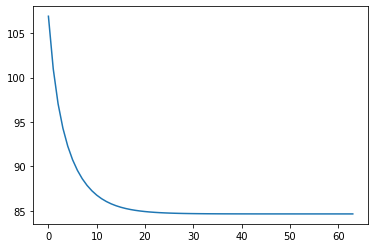

In [7]:
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')

x_train = x_train.T
y_train = y_train[np.newaxis, :]  # 1 x num_data
print(np.shape(x_train), np.shape(y_train))
num_training = np.shape(x_train)[1]

# to make it easier to work with theta0
x_train_bias =  np.vstack((np.ones((1, num_training)), x_train))  # num_features x num_data
print(f'x_train_bias = {np.shape(x_train_bias)}')

num_features = np.shape(x_train_bias)[0]
init_theta = np.zeros((1, num_features))
learning_rate = 0.1
num_steps = 5000

final_theta, loss_history = gradient_descent(x_train_bias, y_train, init_theta, learning_rate, num_steps)
plt.figure(); plt.plot(loss_history)

I used x_train transpose because I wanted to multiply matrix.X_train_bias is a vertical matrix instead of horizontal to make it easier to work.
As can be seen after 63 steps we stop. because the last new theta is not significant anymore. the last loss function is almost 85.

In [8]:
y_predict = np.matmul(final_theta, x_train_bias)

We apply the final theta on our x_train to achieve a prediction.

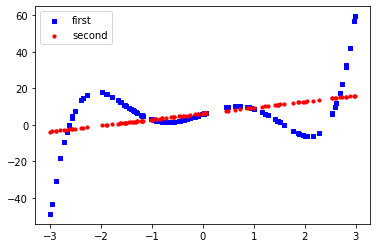

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_train.flatten(), y_train.flatten(), s=10, c='b', marker="s", label='first')
ax1.scatter(x_train.flatten(), y_predict.flatten(), s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

As can be seen it does not fit very well.

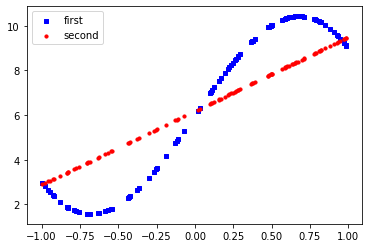

In [10]:
x_test = np.load('/content/x_test.npy')
y_test = np.load('/content/y_test.npy')

x_test = x_test.T
y_test = y_test[np.newaxis, :]  # 1 x num_data
num_test = np.shape(y_test)[1]
x_test_bias = np.vstack((np.ones((1, num_test)), x_test)) 
y_predict_test = np.matmul(final_theta, x_test_bias)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_test.flatten(), y_test.flatten(), s=10, c='b', marker="s", label='first')
ax1.scatter(x_test.flatten(), y_predict_test.flatten(), s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

We test the prediction in a small segment but it does not fit so far.

#Trying polynomial

In [11]:
x2 = np.square(x_train)
x3 = np.power(x_train, 3)
x5 = np.power(x_train, 5)
sinx = np.sin(x_train)

nn_x_train = np.vstack([x_train_bias, x2, x3, x5, sinx])
print(np.shape(nn_x_train))

(6, 100)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in add


[[nan nan nan nan nan nan]]


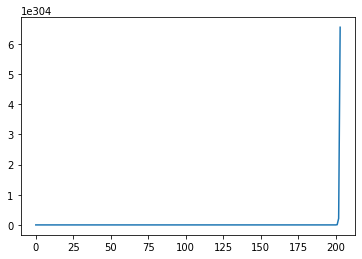

In [12]:
num_features = np.shape(nn_x_train)[0]
init_theta = np.zeros((1, num_features))
learning_rate = 0.001
num_steps = 10000

final_theta, loss_history = gradient_descent(nn_x_train, y_train, init_theta, learning_rate, num_steps, do_print=False)
print(final_theta)
plt.figure(); plt.plot(loss_history)


As we try some basic functions with the same alpha, suddenly it stops working.
What we can do at this situation is that decrease the alpha and see what happens.

[[ 5.47916001  3.7355581   0.08618613 -6.58127263  0.91228304  4.72498727]]


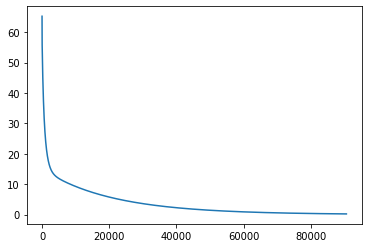

In [13]:
num_features = np.shape(nn_x_train)[0]
init_theta = np.zeros((1, num_features))
learning_rate = 0.0001
num_steps = 100000

final_theta, loss_history = gradient_descent(nn_x_train, y_train, init_theta, learning_rate, num_steps, do_print=False)
print(final_theta)
plt.figure(); plt.plot(loss_history)

It works!!! The loss function is close to zero and we found our theta.

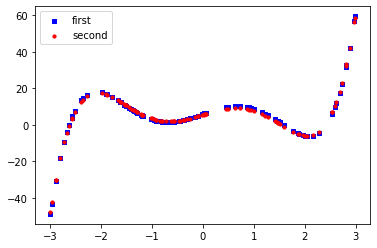

In [14]:
y_pred = np.matmul(final_theta, nn_x_train)
plot_data(
    x=x_train,
    y_gt=y_train,
    y_pred=y_pred
)

In [15]:
np.shape(y_train)

(1, 100)

In [16]:
final_theta

array([[ 5.47916001,  3.7355581 ,  0.08618613, -6.58127263,  0.91228304,
         4.72498727]])

The lowest theta is for x square, 0.086. In conclusion, we can somehow ignore x square because it does not really influnce significantly.